<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork/images/IDSN-logo.png" width="400"> </a>

<h1 align=center><font size = 5>Convolutional Neural Networks with Keras</font></h1>


In this lab, we will learn how to use the Keras library to build convolutional neural networks. We will also use the popular MNIST dataset and we will compare our results to using a conventional neural network.


<h2>Convolutional Neural Networks with Keras</h2>

<h3>Objective for this Notebook<h3>    
<h5> 1. How to use the Keras library to build convolutional neural networks.</h5>
<h5> 2. Convolutional Neural Network with One Convolutional and Pooling Layers.</h5>
<h5> 3. Convolutional Neural Network with Two Convolutional and Pooling Layers.</h5>



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
      
1. <a href="#item41">Import Keras and Packages</a>   
2. <a href="#item42">Convolutional Neural Network with One Convolutional and Pooling Layers</a>  
3. <a href="#item43">Convolutional Neural Network with Two Convolutional and Pooling Layers</a>  

</font>
</div>


<a id='item41'></a>


## Import Keras and Packages


Let's start by importing the keras libraries and the packages that we would need to build a neural network.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
# If you run this notebook on a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
#!pip install keras==2.1.6

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/fra

When working with convolutional neural networks in particular, we will need additional packages.


In [4]:
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

In [7]:
# Load the dataset
data = pd.read_csv('https://cocl.us/concrete_data')

# Display the first few rows of the dataset
data.head()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<a id='item42'></a>


## Split the dataset into features X and target Y


In [11]:
# Split the dataset into features (X) and target (y)
X = data.drop('Strength', axis=1)
y = data['Strength']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalize the features for better performance



In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Build the Neural Network model

In [14]:
# Initialize the model
model = Sequential()

# Add input layer and first hidden layer with 10 neurons and ReLU activation
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))

# Add a second hidden layer with 10 neurons
model.add(Dense(10, activation='relu'))

# Add output layer with 1 neuron (regression task)
model.add(Dense(1))

# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(lr=0.01), loss='mse')


Next we train the model

In [15]:
# Train the model for 100 epochs with a batch size of 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)




Train on 824 samples, validate on 206 samples
Epoch 1/100


2024-10-04 03:55:21.415932: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2024-10-04 03:55:21.421093: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394325000 Hz
2024-10-04 03:55:21.421736: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562e40c28dc0 executing computations on platform Host. Devices:
2024-10-04 03:55:21.421780: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2024-10-04 03:55:21.563985: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

824/824 [==============================] - 0s 467us/step - loss: 1374.8950 - val_loss: 984.2601
Epoch 2/100
824/824 [==============================] - 0s 116us/step - loss: 609.8368 - val_loss: 217.0316
Epoch 3/100
824/824 [==============================] - 0s 115us/step - loss: 235.6823 - val_loss: 163.1965
Epoch 4/100
824/824 [==============================] - 0s 121us/step - loss: 177.1174 - val_loss: 141.5339
Epoch 5/100
824/824 [==============================] - 0s 113us/step - loss: 155.0029 - val_loss: 127.1689
Epoch 6/100
824/824 [==============================] - 0s 96us/step - loss: 142.2511 - val_loss: 123.9818
Epoch 7/100
824/824 [==============================] - 0s 79us/step - loss: 137.1826 - val_loss: 118.3878
Epoch 8/100
824/824 [==============================] - 0s 94us/step - loss: 131.4790 - val_loss: 114.1304
Epoch 9/100
824/824 [==============================] - 0s 92us/step - loss: 127.6774 - val_loss: 110.8870
Epoch 10/100
824/824 [==============================

Evaluate the Model

In [16]:
# Evaluate the model performance on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MSE Loss: {test_loss}')


Test MSE Loss: 50.88384024610797


------------------------------------------


<a id='item43'></a>


## Vizualize the training process


Let's redefine our convolutional model so that it has two convolutional and pooling layers instead of just one layer of each.


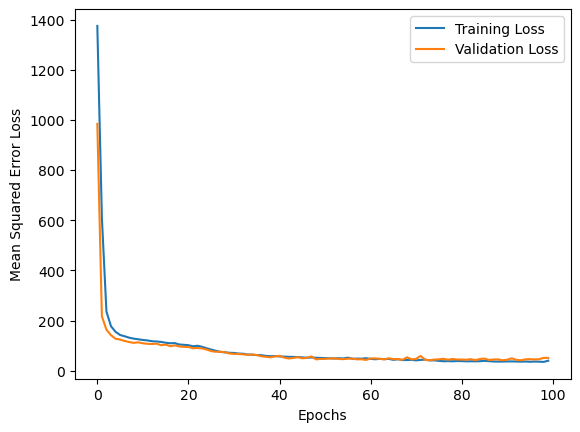

In [17]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


Making Predictions

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Display first 5 predictions vs actual values
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.flatten()})
comparison.head()


,Actual,Predicted
0,52.91,50.747295
1,55.90,40.241589
2,74.50,63.480789
3,35.30,36.013428
4,10.54,16.272081


### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-21  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


This notebook is part of a course on **Coursera** called *Introduction to Deep Learning & Neural Networks with Keras*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0101EN_Coursera_Week4_LAB1).


<hr>

Copyright &copy; 2019 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_medium=dswb&utm_source=bducopyrightlink&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01).
